In [63]:
import json
import pickle

In [64]:
def get_friendly_name(param_name):
    return param_name#.split(".")[-2]

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
from collections import defaultdict
import os

def plot_function(base_string, title, is_mup, max_time=5, d_models=[256, 512, 1024, 2048], n_heads=[16], include_only=None):

    
    fig, axs = plt.subplots(nrows=1, ncols=max_time, figsize=(8 * max_time, 8))
    for ax, time_step in zip(axs, range(max_time)):
        print(ax)
        per_layer_activations = defaultdict(list)

        for d_model in d_models:
            for n_head in n_heads:
                activation_json_file = os.path.join(base_string.format(d_model, n_head), f"batch_{time_step}.pickle")

               # Open the JSON file
                with open(activation_json_file, "rb") as f:
                    print(activation_json_file)
                    data = pickle.load(f) 

                    print(data)
                    for param_name, val in data.items():
                        per_layer_activations[param_name].append(val)
        print(per_layer_activations)
    

        ax.set_title(title.format(time_step))
        cmap  = cm.get_cmap('viridis', len(per_layer_activations))
        for i, (param_name, scaled_versions) in enumerate(per_layer_activations.items()):
            if include_only:
                if include_only != param_name:
                    continue
                # continue
            ax.plot(d_models, scaled_versions, label=get_friendly_name(param_name))
        ax.set_xlabel("d_model")
        ax.set_ylabel("L1 Norm")
        ax.loglog(base=2)
    axs[0].legend()

    plot_title = f"activations_{'mup' if is_mup else 'non_mup'}_max_time_{max_time}.png"

    # plt.savefig(plot_title, dpi=300)

Axes(0.125,0.11;0.133621x0.77)
/root/small_2_layers_mup_with_Wq_on_scaled_d_model_256_n_head_16/batch_0.pickle
{'activations/l1_norm/module.model.transformer.wte_output': 0.0708022816106677, 'activations/l1_norm/module.model.transformer.emb_drop_output': 0.0708022816106677, 'activations/l1_norm/module.model.transformer.blocks.0.ln_1_output': 0.796875, 'activations/l1_norm/module.model.transformer.blocks.0.attn.Wqkv_output': 1.1171875, 'activations/l1_norm/module.model.transformer.blocks.0.attn.out_proj_output': 0.3421630859375, 'activations/l1_norm/module.model.transformer.blocks.0.attn_output': 0.341796875, 'activations/l1_norm/module.model.transformer.blocks.0.resid_attn_dropout_output': 0.3421630859375, 'activations/l1_norm/module.model.transformer.blocks.0.ln_2_output': 0.79931640625, 'activations/l1_norm/module.model.transformer.blocks.0.mlp.mlp_up_output': 1.1328125, 'activations/l1_norm/module.model.transformer.blocks.0.mlp.mlp_act_output': 0.568603515625, 'activations/l1_norm/m

/tmp/ipykernel_4448/1229939826.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap  = cm.get_cmap('viridis', len(per_layer_activations))


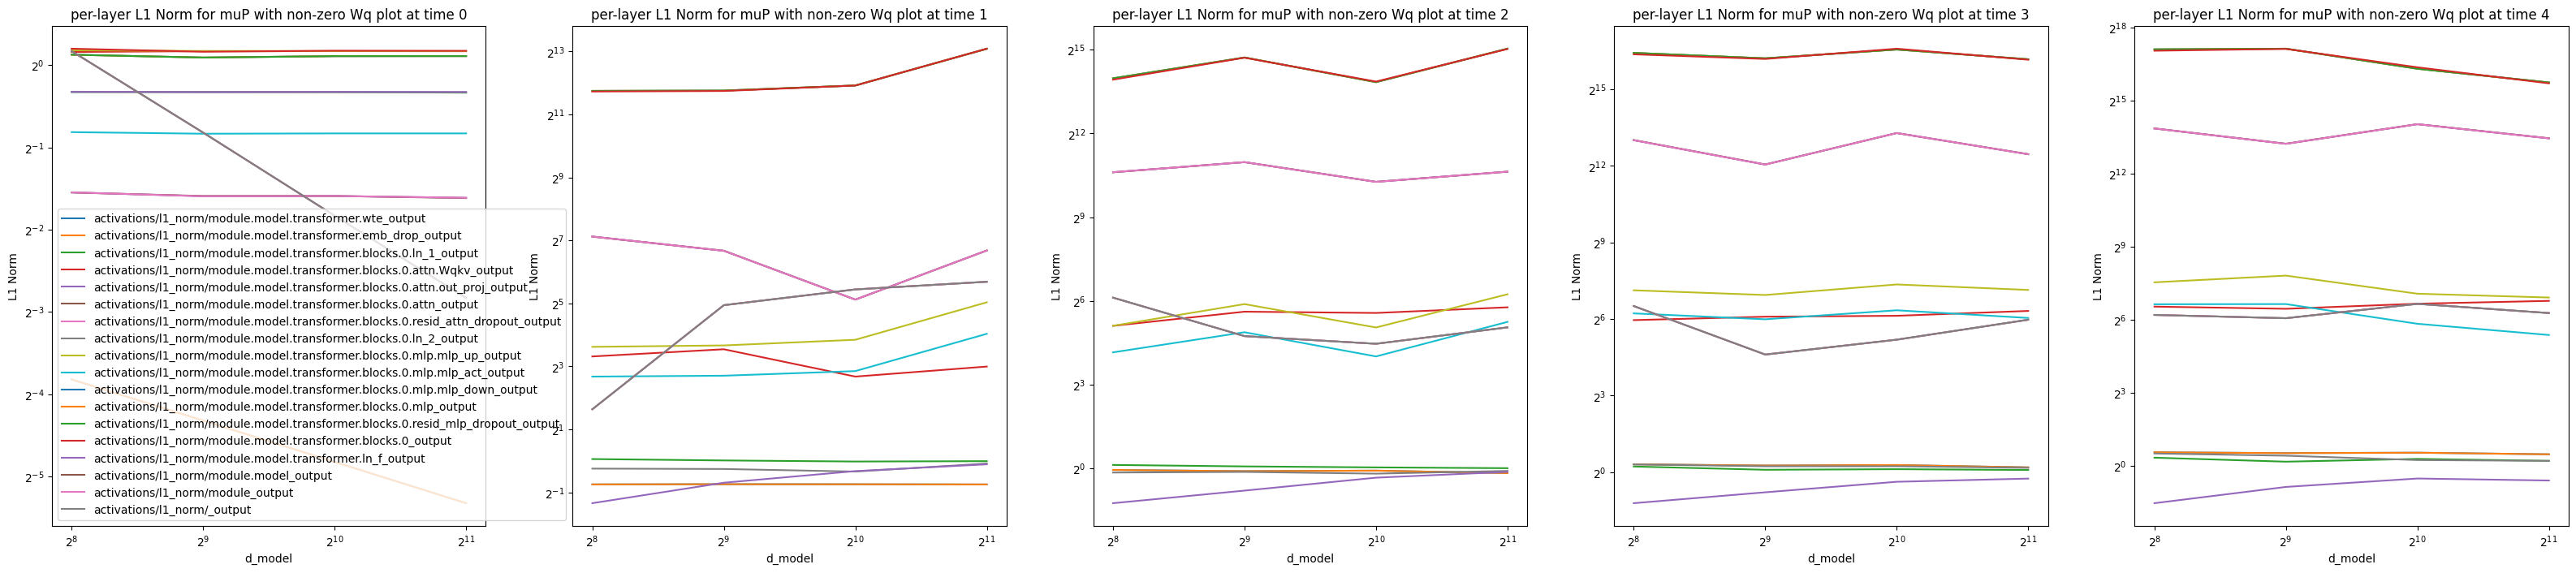

In [87]:
plot_function("/root/small_2_layers_mup_with_Wq_on_scaled_d_model_{}_n_head_{}", "per-layer L1 Norm for muP with non-zero Wq plot at time {}", is_mup=True)

In [ ]:
plot_function("/root/small_2_layers_mup_with_Wq_on_divide_by_d_model_logits_scaled_d_model_{}_n_head_{}", "per-layer L1 Norm for muP plot with non-zero Wq and divide by d_model \n at time {}", is_mup=True)

In [ ]:
plot_function("/root/small_2_layers_mup_scaled_d_model_{}_n_head_{}", "per-layer L1 Norm for muP plot at time {}", is_mup=True)

In [ ]:
plot_function("/root/small_2_layers_no_mup_scaled_d_model_{}_n_head_{}", "per-layer L1 Norm for SP plot at time {}", is_mup=False)

In [98]:
def plot_function_2(base_strings, prefixes, title, max_time=5, d_models=[256, 512, 1024, 2048], n_heads=[16], include_only=None):
    
    assert len(base_strings) == len(prefixes)

    fig, axs = plt.subplots(nrows=1, ncols=max_time, figsize=(8 * max_time, 8))
    for ax, time_step in zip(axs, range(max_time)):
        print(ax)
        per_layer_activations = [defaultdict(list) for _ in  range(len(base_strings))]

        for d_model in d_models:
            for n_head in n_heads:
                for i, base_string in enumerate(base_strings):
                    activation_json_file = os.path.join(base_string.format(d_model, n_head), f"batch_{time_step}.pickle")

                    # Open the JSON file
                    with open(activation_json_file, "rb") as f:
                        print(activation_json_file)
                        data = pickle.load(f) 

                        print(data)
                        for param_name, val in data.items():
                            per_layer_activations[i][param_name].append(val)
        print(per_layer_activations[0])
        print(per_layer_activations[1])
        # 5/0.0
    

        ax.set_title(title.format(time_step))
        cmap  = cm.get_cmap('viridis', len(per_layer_activations))
        for layer_num, (prefix, per_layer_mag) in enumerate(zip(prefixes, per_layer_activations)):
            for i, (param_name, scaled_versions) in enumerate(per_layer_mag.items()):
                if include_only:
                    if include_only != param_name:
                        continue
                # continue
                print(d_models)
                print(scaled_versions)
                ax.plot(d_models, scaled_versions, label=f"{prefix} {get_friendly_name(param_name)}", c=f"C{layer_num}")
        ax.set_xlabel("d_model")
        ax.set_ylabel("L1 Norm")
        ax.loglog(base=2)
    axs[0].legend()



    # plt.savefig(plot_title, dpi=300)

Axes(0.125,0.11;0.133621x0.77)
/root/small_2_layers_mup_with_Wq_on_scaled_d_model_256_n_head_16/batch_0.pickle
{'activations/l1_norm/module.model.transformer.wte_output': 0.0708022816106677, 'activations/l1_norm/module.model.transformer.emb_drop_output': 0.0708022816106677, 'activations/l1_norm/module.model.transformer.blocks.0.ln_1_output': 0.796875, 'activations/l1_norm/module.model.transformer.blocks.0.attn.Wqkv_output': 1.1171875, 'activations/l1_norm/module.model.transformer.blocks.0.attn.out_proj_output': 0.3421630859375, 'activations/l1_norm/module.model.transformer.blocks.0.attn_output': 0.341796875, 'activations/l1_norm/module.model.transformer.blocks.0.resid_attn_dropout_output': 0.3421630859375, 'activations/l1_norm/module.model.transformer.blocks.0.ln_2_output': 0.79931640625, 'activations/l1_norm/module.model.transformer.blocks.0.mlp.mlp_up_output': 1.1328125, 'activations/l1_norm/module.model.transformer.blocks.0.mlp.mlp_act_output': 0.568603515625, 'activations/l1_norm/m

/tmp/ipykernel_4448/3509965963.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap  = cm.get_cmap('viridis', len(per_layer_activations))


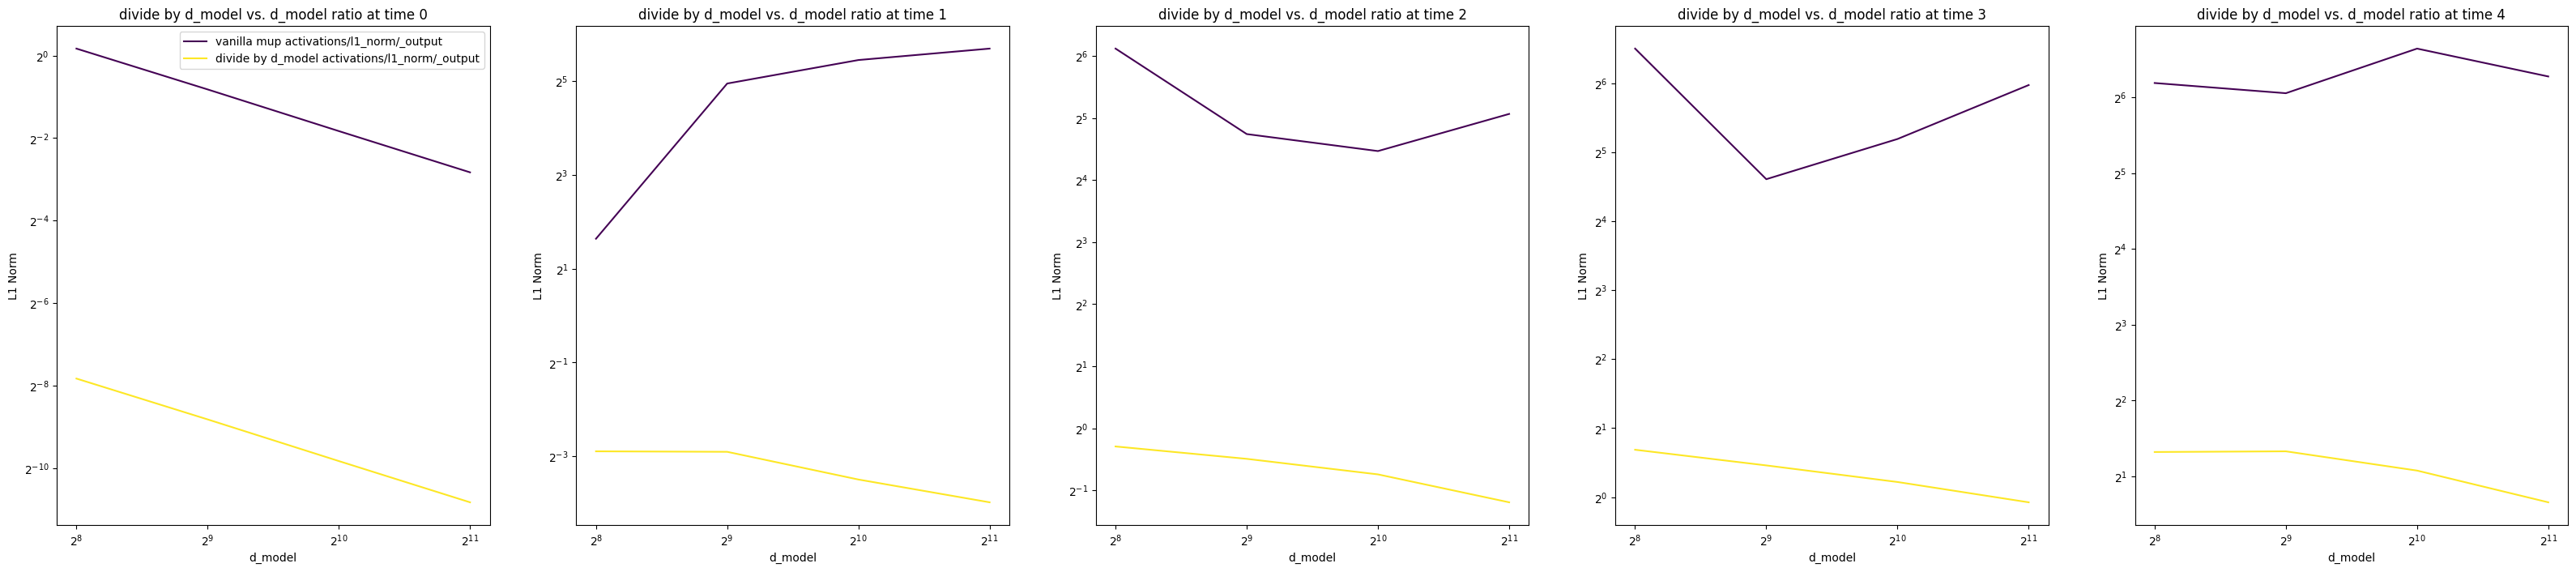

In [99]:
plot_function_2([
"/root/small_2_layers_mup_with_Wq_on_scaled_d_model_{}_n_head_{}",
"/root/small_2_layers_mup_with_Wq_on_divide_by_d_model_logits_scaled_d_model_{}_n_head_{}"
],
prefixes=[
    "vanilla mup",
    "divide by d_model"
],
title="divide by d_model vs. d_model ratio at time {}",
include_only="activations/l1_norm/_output")

Axes(0.125,0.11;0.133621x0.77)
/root/small_2_layers_mup_with_Wq_on_scaled_d_model_256_n_head_16/batch_0.pickle
{'activations/l1_norm/module.model.transformer.wte_output': 0.0708022816106677, 'activations/l1_norm/module.model.transformer.emb_drop_output': 0.0708022816106677, 'activations/l1_norm/module.model.transformer.blocks.0.ln_1_output': 0.796875, 'activations/l1_norm/module.model.transformer.blocks.0.attn.Wqkv_output': 1.1171875, 'activations/l1_norm/module.model.transformer.blocks.0.attn.out_proj_output': 0.3421630859375, 'activations/l1_norm/module.model.transformer.blocks.0.attn_output': 0.341796875, 'activations/l1_norm/module.model.transformer.blocks.0.resid_attn_dropout_output': 0.3421630859375, 'activations/l1_norm/module.model.transformer.blocks.0.ln_2_output': 0.79931640625, 'activations/l1_norm/module.model.transformer.blocks.0.mlp.mlp_up_output': 1.1328125, 'activations/l1_norm/module.model.transformer.blocks.0.mlp.mlp_act_output': 0.568603515625, 'activations/l1_norm/m

/tmp/ipykernel_4448/3509965963.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap  = cm.get_cmap('viridis', len(per_layer_activations))


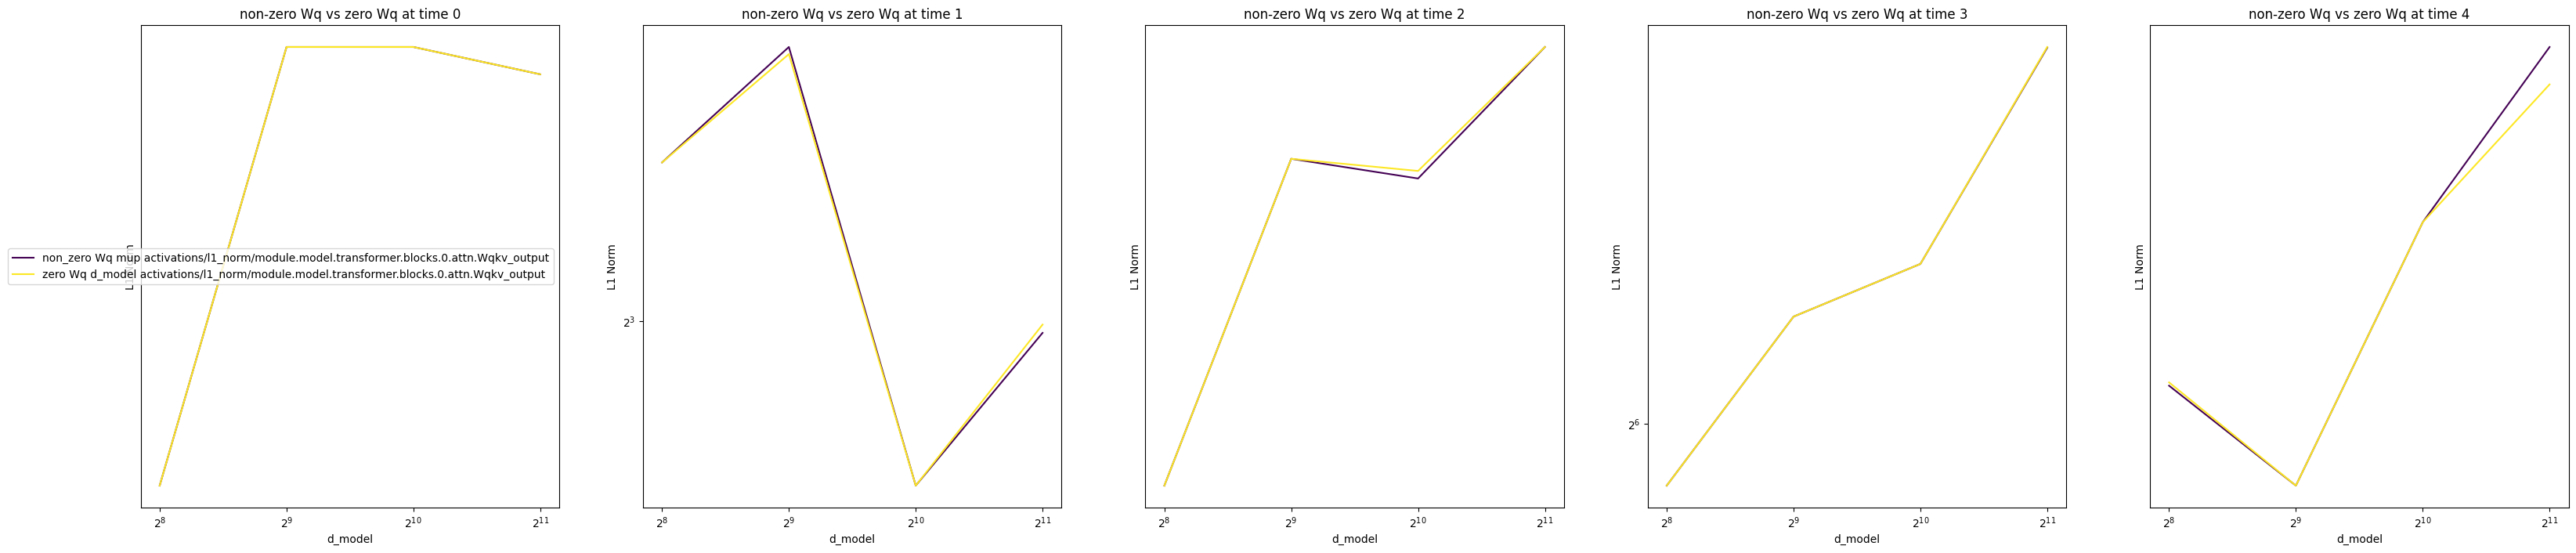

In [100]:
plot_function_2([
"/root/small_2_layers_mup_with_Wq_on_scaled_d_model_{}_n_head_{}",
"/root/small_2_layers_mup_scaled_d_model_{}_n_head_{}"
],
prefixes=[
    "non_zero Wq mup",
    "zero Wq d_model"
],
title="non-zero Wq vs zero Wq at time {}",
include_only="activations/l1_norm/module.model.transformer.blocks.0.attn.Wqkv_output")

Axes(0.125,0.11;0.065678x0.77)
/root/small_2_layers_no_mup_change_lr_scaled_d_model_256_n_head_16/batch_0.pickle
{'activations/l1_norm/module.model.transformer.wte_output': 0.07051669713109732, 'activations/l1_norm/module.model.transformer.wpe_output': 0.07045606523752213, 'activations/l1_norm/module.model.transformer.emb_drop_output': 0.09962448524311185, 'activations/l1_norm/module.model.transformer.blocks.0.ln_1_output': 0.797119140625, 'activations/l1_norm/module.model.transformer.blocks.0.attn.Wqkv_output': 1.12744140625, 'activations/l1_norm/module.model.transformer.blocks.0.attn.out_proj_output': 0.29052734375, 'activations/l1_norm/module.model.transformer.blocks.0.attn_output': 0.291015625, 'activations/l1_norm/module.model.transformer.blocks.0.resid_attn_dropout_output': 0.29052734375, 'activations/l1_norm/module.model.transformer.blocks.0.ln_2_output': 0.79931640625, 'activations/l1_norm/module.model.transformer.blocks.0.mlp.mlp_up_output': 1.12841796875, 'activations/l1_norm

/tmp/ipykernel_4448/1229939826.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap  = cm.get_cmap('viridis', len(per_layer_activations))


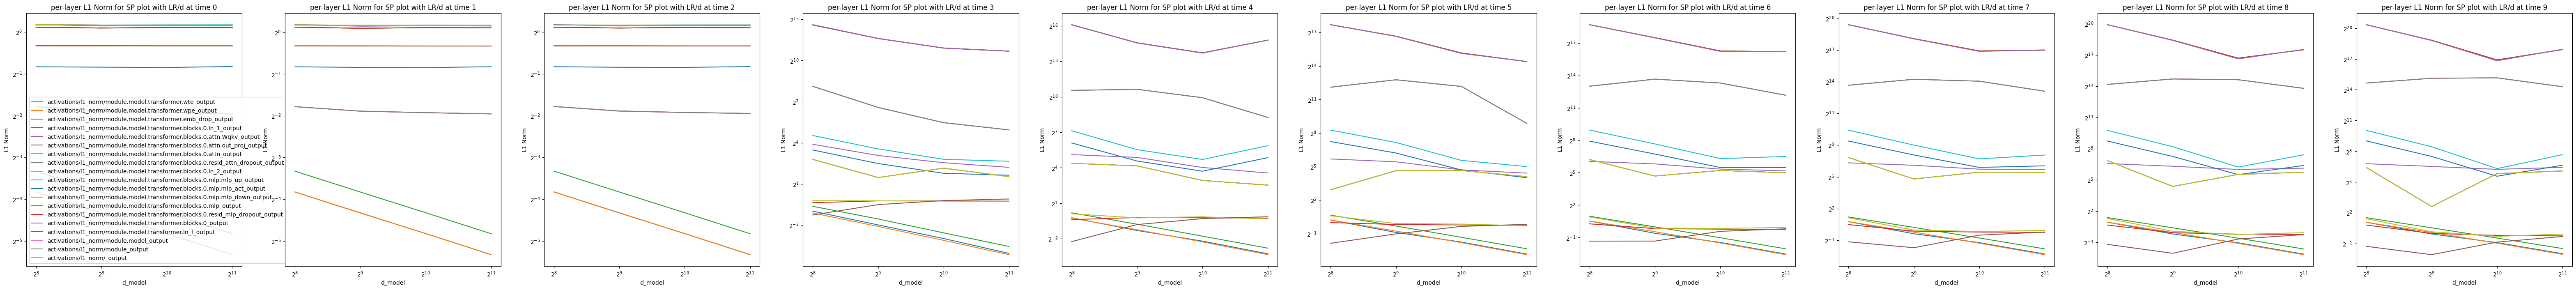

In [101]:
plot_function("/root/small_2_layers_no_mup_change_lr_scaled_d_model_{}_n_head_{}", "per-layer L1 Norm for SP plot with LR/d at time {}", is_mup=False, max_time=10)

Axes(0.125,0.11;0.065678x0.77)
/root/small_2_layers_mup_with_Wq_on_scaled_d_model_256_n_head_16/batch_0.pickle
{'activations/l1_norm/module.model.transformer.wte_output': 0.0708022816106677, 'activations/l1_norm/module.model.transformer.emb_drop_output': 0.0708022816106677, 'activations/l1_norm/module.model.transformer.blocks.0.ln_1_output': 0.796875, 'activations/l1_norm/module.model.transformer.blocks.0.attn.Wqkv_output': 1.1171875, 'activations/l1_norm/module.model.transformer.blocks.0.attn.out_proj_output': 0.3421630859375, 'activations/l1_norm/module.model.transformer.blocks.0.attn_output': 0.341796875, 'activations/l1_norm/module.model.transformer.blocks.0.resid_attn_dropout_output': 0.3421630859375, 'activations/l1_norm/module.model.transformer.blocks.0.ln_2_output': 0.79931640625, 'activations/l1_norm/module.model.transformer.blocks.0.mlp.mlp_up_output': 1.1328125, 'activations/l1_norm/module.model.transformer.blocks.0.mlp.mlp_act_output': 0.568603515625, 'activations/l1_norm/m

/tmp/ipykernel_4448/3509965963.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap  = cm.get_cmap('viridis', len(per_layer_activations))


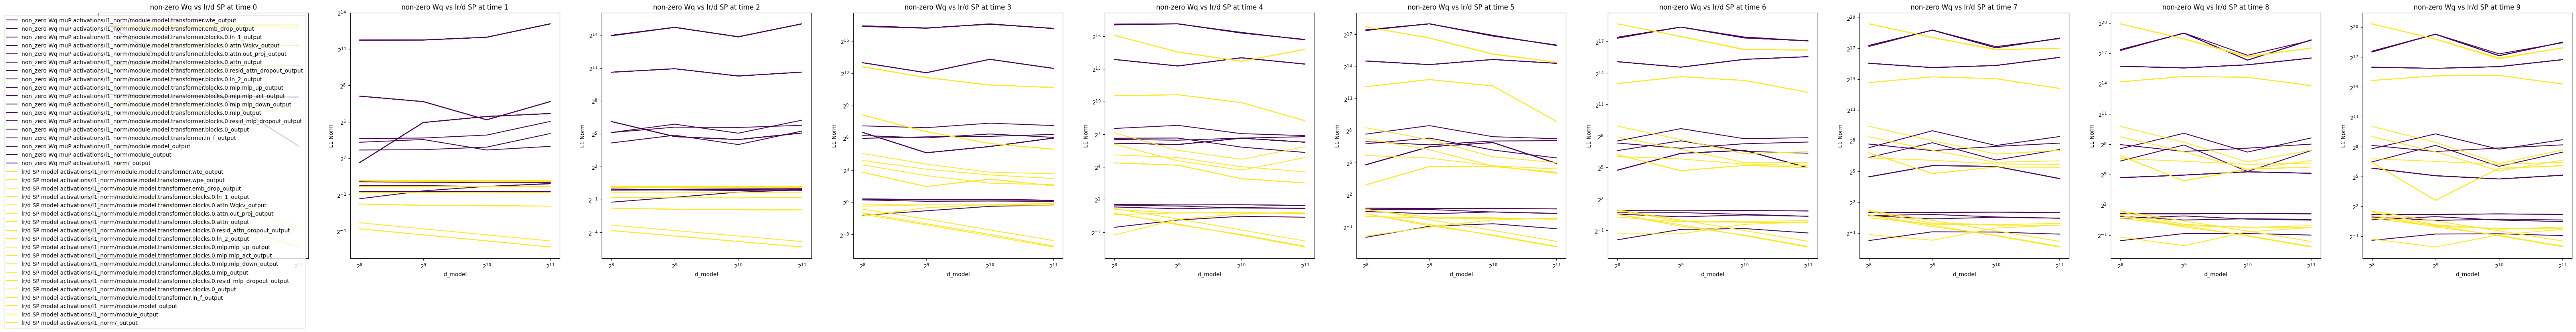

In [103]:
plot_function_2([
"/root/small_2_layers_mup_with_Wq_on_scaled_d_model_{}_n_head_{}",
"/root/small_2_layers_no_mup_change_lr_scaled_d_model_{}_n_head_{}"
],
prefixes=[
    "non_zero Wq muP",
    "lr/d SP model"
],
title="non-zero Wq vs lr/d SP at time {}",
max_time=10)